In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

In [2]:
df=pd.read_csv(r'C:\Users\gabri\Desktop\Residêcia\SiDi\Projeto Licitação\Data\dados_taguiados.csv')

In [3]:
df.head(1)

,Unnamed: 0,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Objeto,Situação Licitação,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,Município,data,Data Abertura,Total,Tipo,Tag
0,0,12018,120630,BASE AEREA DE DE MANAUS,3,Concorrência,67290015424201435,Objeto: Contratação de empresa de engenharia e...,Evento de Resultado de Julgame,52000,Ministério da Defesa,52111,Comando da Aeronáutica,MANAUS,19/07/2018,NaN,1063307.91,Obras,0


In [4]:
df_1 = df[['data','Total']]

In [5]:
df_1.set_index('data')

,Total
data,
19/07/2018,1063307.91
19/07/2018,689750.64
12/07/2018,714.57
23/07/2018,3241361.87
18/07/2018,3222277.60
...,...
01/07/2021,3672.00
31/05/2021,45000.00
15/01/2021,4300.00


In [6]:
df_1["data"] = pd.to_datetime(df_1['data'])

<ipython-input-6-ac81db72f3a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["data"] = pd.to_datetime(df_1['data'])


In [7]:
df_1 = df_1.groupby(by=['data']).sum().groupby(level=[0]).cumsum()

In [8]:
df_1.dtypes

Total    float64
dtype: object

In [9]:
df_1.sort_values(['data'], inplace = True)

In [10]:
df_1

,Total
data,
2018-01-07,1.331000e+04
2018-01-08,1.405277e+08
2018-01-09,1.206963e+04
2018-01-10,8.326853e+07
2018-01-11,1.231171e+08
...,...
2021-12-03,5.881352e+08
2021-12-04,9.691125e+07
2021-12-05,1.513667e+08


#### Diferenciando a série

In [19]:
df_1_d = df_1.diff().dropna()

#### Plotando a série

<AxesSubplot:xlabel='data'>

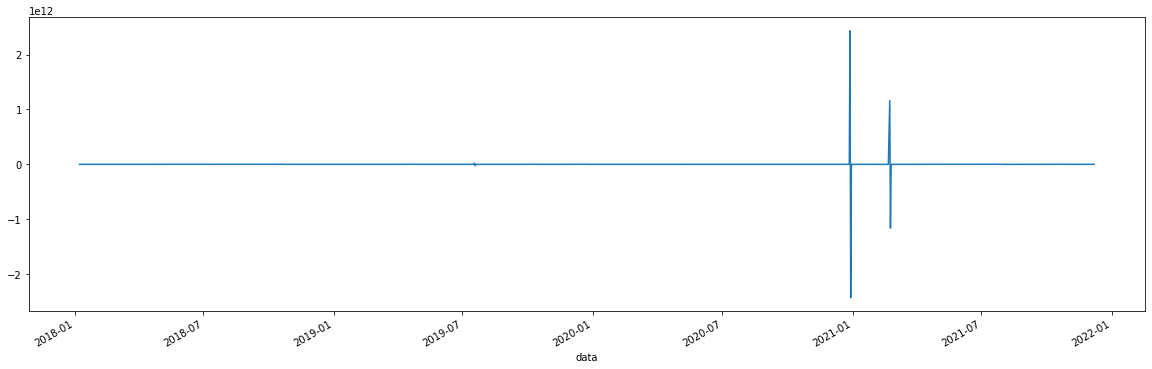

In [20]:
df_1_d["Total"].plot(figsize=(20,6))

<AxesSubplot:>

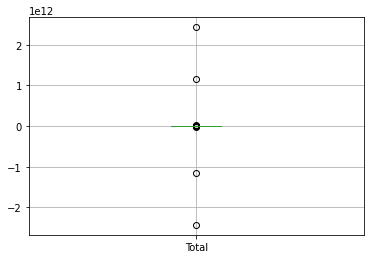

In [21]:
df_1_d.boxplot()

#### Decomposição da série

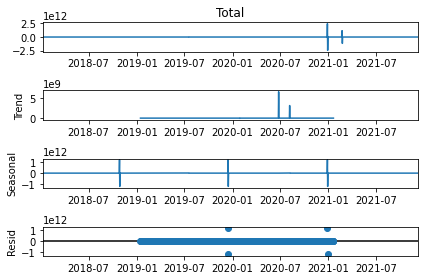

In [22]:
df_decomp = tsa.seasonal_decompose(df_1_d["Total"], period = 365 )
df_decomp.plot();

#### Média movel mensal

<AxesSubplot:xlabel='data'>

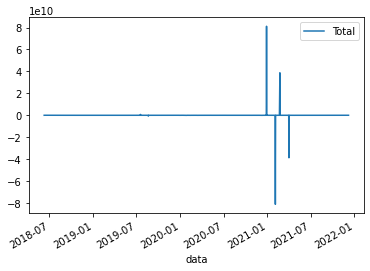

In [24]:
df_1_d.rolling(30).mean().plot()

#### Retirando outliers 

In [27]:
df_1_d.describe()

,Total
count,1.051000e+03
mean,7.587104e+05
std,1.177440e+11
min,-2.434143e+12
25%,-1.088320e+08
50%,-1.600000e+04
75%,1.177918e+08
max,2.434945e+12


In [28]:
mean = float(df_1_d.mean())

In [29]:
std = float(df_1_d.std())

In [31]:
df_2 = df_1_d[df_1_d['Total'] <= mean + 2.5*std]

<AxesSubplot:xlabel='data'>

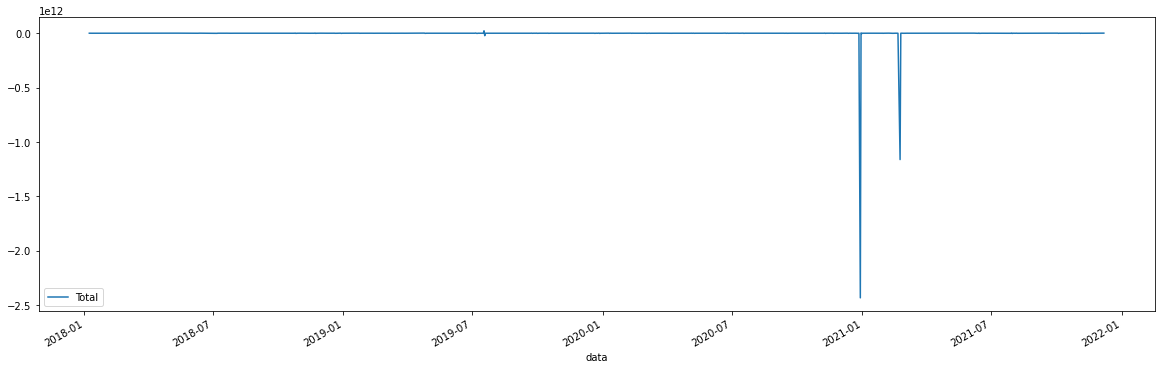

In [32]:
df_2.plot(figsize=(20,6))

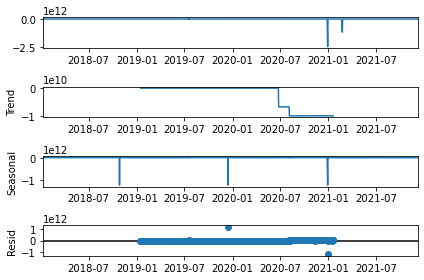

In [33]:
df_decomp = tsa.seasonal_decompose(df_2, period = 365 )
df_decomp.plot();

# Analise numérica

In [34]:
df.head(1)

,Unnamed: 0,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Objeto,Situação Licitação,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,Município,data,Data Abertura,Total,Tipo,Tag
0,0,12018,120630,BASE AEREA DE DE MANAUS,3,Concorrência,67290015424201435,Objeto: Contratação de empresa de engenharia e...,Evento de Resultado de Julgame,52000,Ministério da Defesa,52111,Comando da Aeronáutica,MANAUS,19/07/2018,NaN,1063307.91,Obras,0


In [35]:
df_3 = pd.DataFrame(df["data"])

In [36]:
df_3["data"] = pd.to_datetime(df_3['data'])

In [37]:
df_3 = pd.DataFrame(df_3.value_counts()).sort_values(['data'])

In [38]:
df_3 = df_3.rename(columns={"0":"Numero_Lic"})

In [39]:
df_3.head(1)

,0
data,
2018-01-07,4


#### Plotando a série

<AxesSubplot:xlabel='data'>

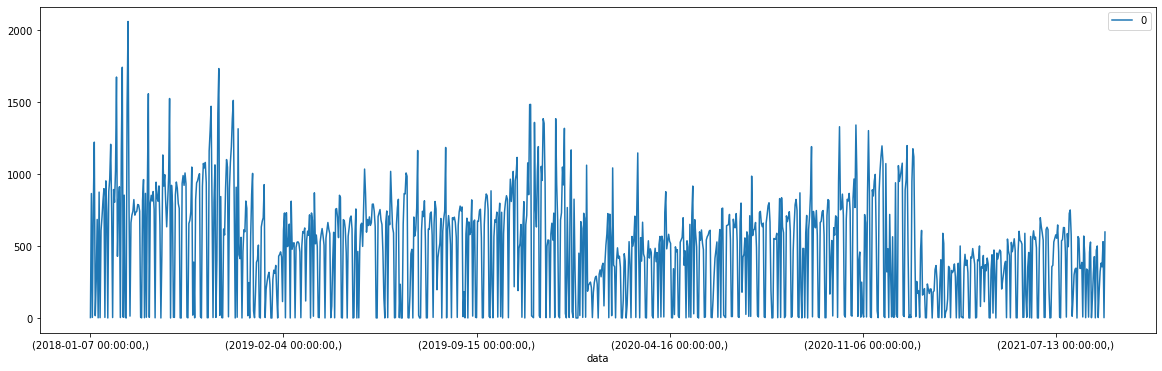

In [40]:
df_3.plot(figsize=(20,6))

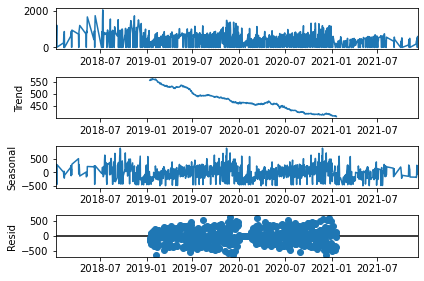

In [41]:
df_decomp = tsa.seasonal_decompose(df_3, period = 365 )
df_decomp.plot();

#### Diferenciando a série 

In [42]:
df_3_d = df_3.diff().dropna()

<AxesSubplot:xlabel='data'>

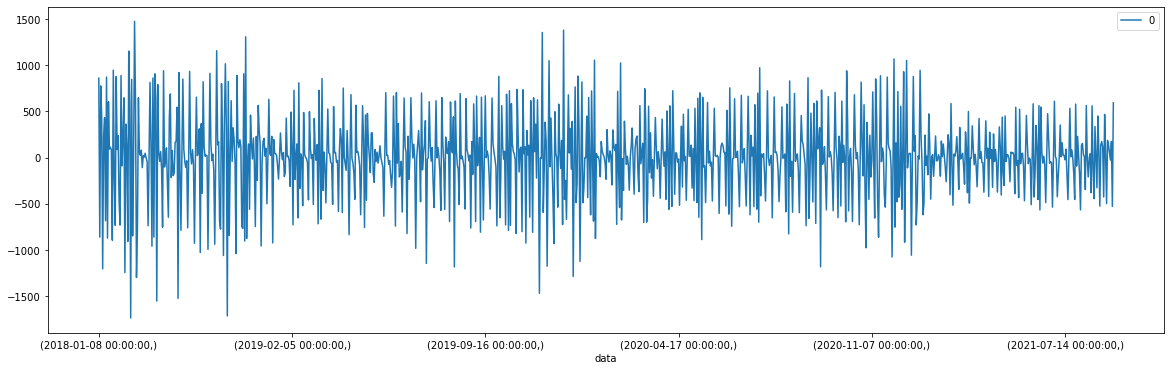

In [43]:
df_3_d.plot(figsize=(20,6))

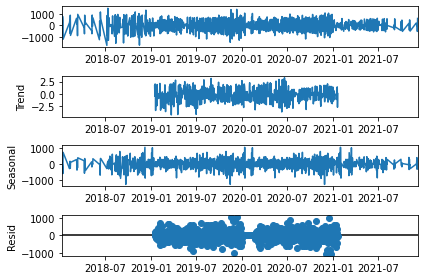

In [44]:
df_decomp = tsa.seasonal_decompose(df_3_d, period = 365 )
df_decomp.plot();